In [1]:
import numpy as np 
import sklearn.metrics.pairwise as pw


In [2]:
A = [[3, 4000, 5]]
B = [[3, 4000, 4]]
C = [[3, 4100, 5]]


In [3]:
print('Euclidean: \t',pw.euclidean_distances(A, B))
print('Cosine: \t',pw.cosine_similarity(A, B))
print('Manhattan: \t',pw.manhattan_distances(A, B))

Euclidean: 	 [[1.]]
Cosine: 	 [[0.99999997]]
Manhattan: 	 [[1.]]


In [4]:
print('Euclidean: \t',pw.euclidean_distances(A, C))
print('Cosine: \t',pw.cosine_similarity(A, C))
print('Manhattan: \t',pw.manhattan_distances(A, C))

Euclidean: 	 [[100.]]
Cosine: 	 [[1.]]
Manhattan: 	 [[100.]]


In [5]:
import sklearn.metrics.pairwise as pw

D = [[6,0,0,3,3]]
E = [[3,0,0,2,2]]
F = [[1,1,1,1,1]]

print('Euclidean E-D: \t',pw.euclidean_distances(D, E))
print('Euclidean E-F: \t',pw.euclidean_distances(E, F))

print('\nCosine: E-D \t',pw.cosine_similarity(D, E))
print('Cosine E-F: \t',pw.cosine_similarity(E, F))

print('\nManhattan: E-D \t',pw.manhattan_distances(D, E))
print('Manhattan E-F: \t',pw.manhattan_distances(E, F))

Euclidean E-D: 	 [[3.31662479]]
Euclidean E-F: 	 [[2.82842712]]

Cosine: E-D 	 [[0.99014754]]
Cosine E-F: 	 [[0.7592566]]

Manhattan: E-D 	 [[5.]]
Manhattan E-F: 	 [[6.]]


In [6]:
import pandas as pd
dataset = pd.DataFrame({'A': [1 , 2, None, 2], 
                        'B': ['red', 'red', 'yellow', 'green'], 
                        'C': [3300, 1250, 4600, 4500],
                        'D': ['MSK', 'SPB', 'EKB', 'MSK']})
dataset

A       B     C    D
0  1.0     red  3300  MSK
1  2.0     red  1250  SPB
2  NaN  yellow  4600  EKB
3  2.0   green  4500  MSK

In [7]:
# OHE encoding
dataset = pd.get_dummies(dataset, columns = ['B'])
dataset

A     C    D  B_green  B_red  B_yellow
0  1.0  3300  MSK        0      1         0
1  2.0  1250  SPB        0      1         0
2  NaN  4600  EKB        0      0         1
3  2.0  4500  MSK        1      0         0

In [8]:
# Label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dataset['D'])

LabelEncoder()

In [9]:
dataset['D'] = le.transform(dataset['D'])
dataset

A     C  D  B_green  B_red  B_yellow
0  1.0  3300  1        0      1         0
1  2.0  1250  2        0      1         0
2  NaN  4600  0        0      0         1
3  2.0  4500  1        1      0         0

In [10]:
# Заполняем пропущенные данные
dataset['A'] = dataset['A'].fillna(np.mean(dataset['A']))
dataset

A     C  D  B_green  B_red  B_yellow
0  1.000000  3300  1        0      1         0
1  2.000000  1250  2        0      1         0
2  1.666667  4600  0        0      0         1
3  2.000000  4500  1        1      0         0

In [11]:
dataset['C_normalized'] = (dataset['C'] - dataset['C'].min()) / (dataset['C'].max() - dataset['C'].min())
dataset['C_standardized'] = (dataset['C'] - dataset['C'].mean()) / dataset['C'].std()
dataset

A     C  D  B_green  B_red  B_yellow  C_normalized  C_standardized
0  1.000000  3300  1        0      1         0      0.611940       -0.072209
1  2.000000  1250  2        0      1         0      0.000000       -1.388018
2  1.666667  4600  0        0      0         1      1.000000        0.762206
3  2.000000  4500  1        1      0         0      0.970149        0.698021

<Axes: >

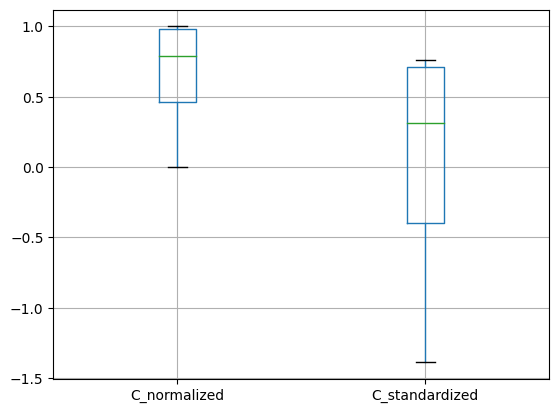

In [22]:
dataset.boxplot(['C_normalized','C_standardized'])